In [1]:
import torch
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Overall workflow and training

Data generation/training can be performed by built-in executable `lasdi`. For this example of Burgers 1D equation, you can simply run on command-line terminal:
```
lasdi burgers1d.yml
```

The workflow can be also manually constructed for those who prefer python scripts and for prototyping. The following code snippets show the high-level view of the workflow in the executable `lasdi`.

In [2]:
import yaml
# add parent directory to path
# from os import sys, path
# sys.path.append('../')
# from src.lasdi.workflow import initialize_trainer, run_samples, pick_samples

from lasdi.workflow import initialize_trainer, run_samples, pick_samples

cfg_file = 'burgers1d-nonadaptive.yml'
with open(cfg_file, 'r') as f:
    config = yaml.safe_load(f)

trainer, param_space, physics, autoencoder, sindy = initialize_trainer(config)
print("Trainer initialized with the following configuration:")
print(param_space.train_space)

# generate initial training/test data
pick_samples(trainer, config)
print("Initial samples picked for training")
print(trainer.X_train.shape)
# run_samples(trainer, config, save_samples=True)
run_samples(trainer, config)
print(trainer.X_train.shape)
print("Training data generated")
# initial training given training data

trainer.train()

while (trainer.restart_iter < trainer.max_iter):
    if (trainer.restart_iter <= trainer.max_greedy_iter):
        # perform greedy sampling to pick up new samples
        pick_samples(trainer, config)
        # update training data with newly picked samples
        run_samples(trainer, config)

    # train over given training data
    trainer.train()

/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/lasdi/inputs.py:37: UserWarning: <class 'str'> does not match the type with the fallback value <class 'int'>!
  warn("%s does not match the type with the fallback value %s!" % (str(type(val)), str(type(fallback))))


Trainer initialized with the following configuration:
[[0.7  0.9 ]
 [0.75 0.9 ]
 [0.8  0.9 ]
 [0.85 0.9 ]
 [0.9  0.9 ]
 [0.7  0.97]
 [0.75 0.97]
 [0.8  0.97]
 [0.85 0.97]
 [0.9  0.97]
 [0.7  1.04]
 [0.75 1.04]
 [0.8  1.04]
 [0.85 1.04]
 [0.9  1.04]
 [0.7  1.1 ]
 [0.75 1.1 ]
 [0.8  1.1 ]
 [0.85 1.1 ]
 [0.9  1.1 ]]
Initial samples picked for training
torch.Size([0])
Loading samples from hdf5 file...
torch.Size([20, 1001, 1001])
Training data generated
Iter: 00001/20000, Loss: 0.2360397130, Loss AE: 0.2360319942, Loss LD: 0.0000031773, Loss COEF: 153.9928894043, max|c|: 04.9, Param: ..., [0.9  1.04], [0.7 1.1], [0.75 1.1 ], [0.8 1.1], [0.85 1.1 ], [0.9 1.1]
Iter: 00002/20000, Loss: 0.1980345100, Loss AE: 0.1980265379, Loss LD: 0.0000021353, Loss COEF: 159.2110595703, max|c|: 05.2, Param: ..., [0.9  1.04], [0.7 1.1], [0.75 1.1 ], [0.8 1.1], [0.85 1.1 ], [0.9 1.1]
Iter: 00003/20000, Loss: 0.1659108847, Loss AE: 0.1659035236, Loss LD: 0.0000030903, Loss COEF: 146.9652099609, max|c|: 05.6, Pa

KeyboardInterrupt: 

If you ran the command instead, a restart file is saved at the end of the training, which can be loaded for post-processing:

In [4]:
# Specify the restart file you have.
# filename = 'lasdi_06_17_2025_17_43.npy'
filename = 'lasdi_07_08_2025_21_56.npy'

import yaml
from lasdi.workflow import initialize_trainer
from lasdi.param import ParameterSpace

cfg_file = 'burgers1d.yml'
with open(cfg_file, 'r') as f:
    config = yaml.safe_load(f)

restart_file = np.load(filename, allow_pickle=True).item()

trainer, param_space, physics, autoencoder, sindy = initialize_trainer(config, restart_file)

/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/lasdi/inputs.py:37: UserWarning: <class 'str'> does not match the type with the fallback value <class 'int'>!
  warn("%s does not match the type with the fallback value %s!" % (str(type(val)), str(type(fallback))))


In [3]:
print(trainer.param_space.train_space)
print(trainer.X_train)


[[0.7  0.9 ]
 [0.75 0.9 ]
 [0.8  0.9 ]
 [0.85 0.9 ]
 [0.9  0.9 ]
 [0.7  0.97]
 [0.75 0.97]
 [0.8  0.97]
 [0.85 0.97]
 [0.9  0.97]
 [0.7  1.04]
 [0.75 1.04]
 [0.8  1.04]
 [0.85 1.04]
 [0.9  1.04]
 [0.7  1.1 ]
 [0.75 1.1 ]
 [0.8  1.1 ]
 [0.85 1.1 ]
 [0.9  1.1 ]]
tensor([[[0.0027, 0.0028, 0.0028,  ..., 0.0028, 0.0028, 0.0027],
         [0.0027, 0.0028, 0.0028,  ..., 0.0028, 0.0028, 0.0027],
         [0.0027, 0.0028, 0.0028,  ..., 0.0028, 0.0028, 0.0027],
         ...,
         [0.0027, 0.0028, 0.0028,  ..., 0.0029, 0.0028, 0.0027],
         [0.0027, 0.0028, 0.0028,  ..., 0.0029, 0.0028, 0.0027],
         [0.0027, 0.0028, 0.0028,  ..., 0.0029, 0.0028, 0.0027]],

        [[0.0029, 0.0030, 0.0030,  ..., 0.0030, 0.0030, 0.0029],
         [0.0029, 0.0030, 0.0030,  ..., 0.0030, 0.0030, 0.0029],
         [0.0029, 0.0030, 0.0030,  ..., 0.0030, 0.0030, 0.0029],
         ...,
         [0.0029, 0.0029, 0.0030,  ..., 0.0031, 0.0030, 0.0029],
         [0.0029, 0.0029, 0.0030,  ..., 0.0031, 0.0030, 0.0

# Post-processing

Load data for post-processing:

In [4]:
coefs = trainer.best_coefs
X_train = trainer.X_train
X_test = trainer.X_test

param_train = param_space.train_space
param_grid = param_space.test_space
test_meshgrid = param_space.test_meshgrid
test_grid_sizes = param_space.test_grid_sizes
n_init = param_space.n_init

n_a_grid, n_w_grid = test_grid_sizes
a_grid, w_grid = test_meshgrid

t_grid = physics.t_grid
x_grid = physics.x_grid
t_mesh, x_mesh = np.meshgrid(t_grid, x_grid)
Dt, Dx = physics.dt, physics.dx

time_dim, space_dim = t_grid.shape[0], x_grid.shape[0]

n_coef = sindy.ncoefs

They can be also loaded directly from restart file:

In [6]:
coefs = restart_file['trainer']['best_coefs']
X_train = restart_file['trainer']['X_train']
X_test = restart_file['trainer']['X_test']

paramspace_dict = restart_file['parameters']
param_train = paramspace_dict['train_space']
param_grid = paramspace_dict['test_space']
test_meshgrid = paramspace_dict['test_meshgrid']
test_grid_sizes = paramspace_dict['test_grid_sizes']
n_init = paramspace_dict['n_init']

n_a_grid, n_w_grid = test_grid_sizes
a_grid, w_grid = test_meshgrid

physics_dict = restart_file['physics']
t_grid = physics_dict['t_grid']
x_grid = physics_dict['x_grid']
t_mesh, x_mesh = np.meshgrid(t_grid, x_grid)
Dt = physics_dict['dt']
Dx = physics_dict['dx']

time_dim, space_dim = t_grid.shape[0], x_grid.shape[0]
n_coef = restart_file['latent_dynamics']['ncoefs']

## Gaussian-process uncertainty evaluation
We evaluated the uncertainties of latent dynamics coefficients over 2d parameter space, with samples from GP prediction:

In [5]:
from lasdi.gp import fit_gps
from lasdi.gplasdi import sample_roms, average_rom
from lasdi.postprocess import compute_errors
from lasdi.gp import eval_gp

n_samples = 20
autoencoder.cpu()

gp_dictionnary = fit_gps(param_space.train_space, coefs)

Zis_samples = sample_roms(autoencoder, physics, sindy, gp_dictionnary, param_grid, n_samples)
Zis_mean = average_rom(autoencoder, physics, sindy, gp_dictionnary, param_grid)

X_pred_mean = autoencoder.decoder(torch.Tensor(Zis_mean)).detach().numpy()
X_pred_samples = autoencoder.decoder(torch.Tensor(Zis_samples)).detach().numpy()

avg_rel_error = np.zeros(param_grid.shape[0])
print(X_pred_mean.shape)
breakpoint
for k in range(param_grid.shape[0]):
    avg_rel_error[k], _ = compute_errors(X_pred_mean[k], physics, X_test[k].numpy())

max_std = np.zeros(param_grid.shape[0])
for k in range(param_grid.shape[0]):
    max_std[k] = X_pred_samples[k].std(0).max()

avg_rel_error = avg_rel_error.reshape([n_w_grid, n_a_grid]).T
max_std = max_std.reshape([n_w_grid, n_a_grid]).T

gp_pred_mean, gp_pred_std = eval_gp(gp_dictionnary, param_grid)

/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) 

(441, 1001, 1001)


# Visualization

Plot mean and standard deviation of coefficient matrix.
For SINDy of dimension 5, the coefficient matrix has a shape of (6, 5).

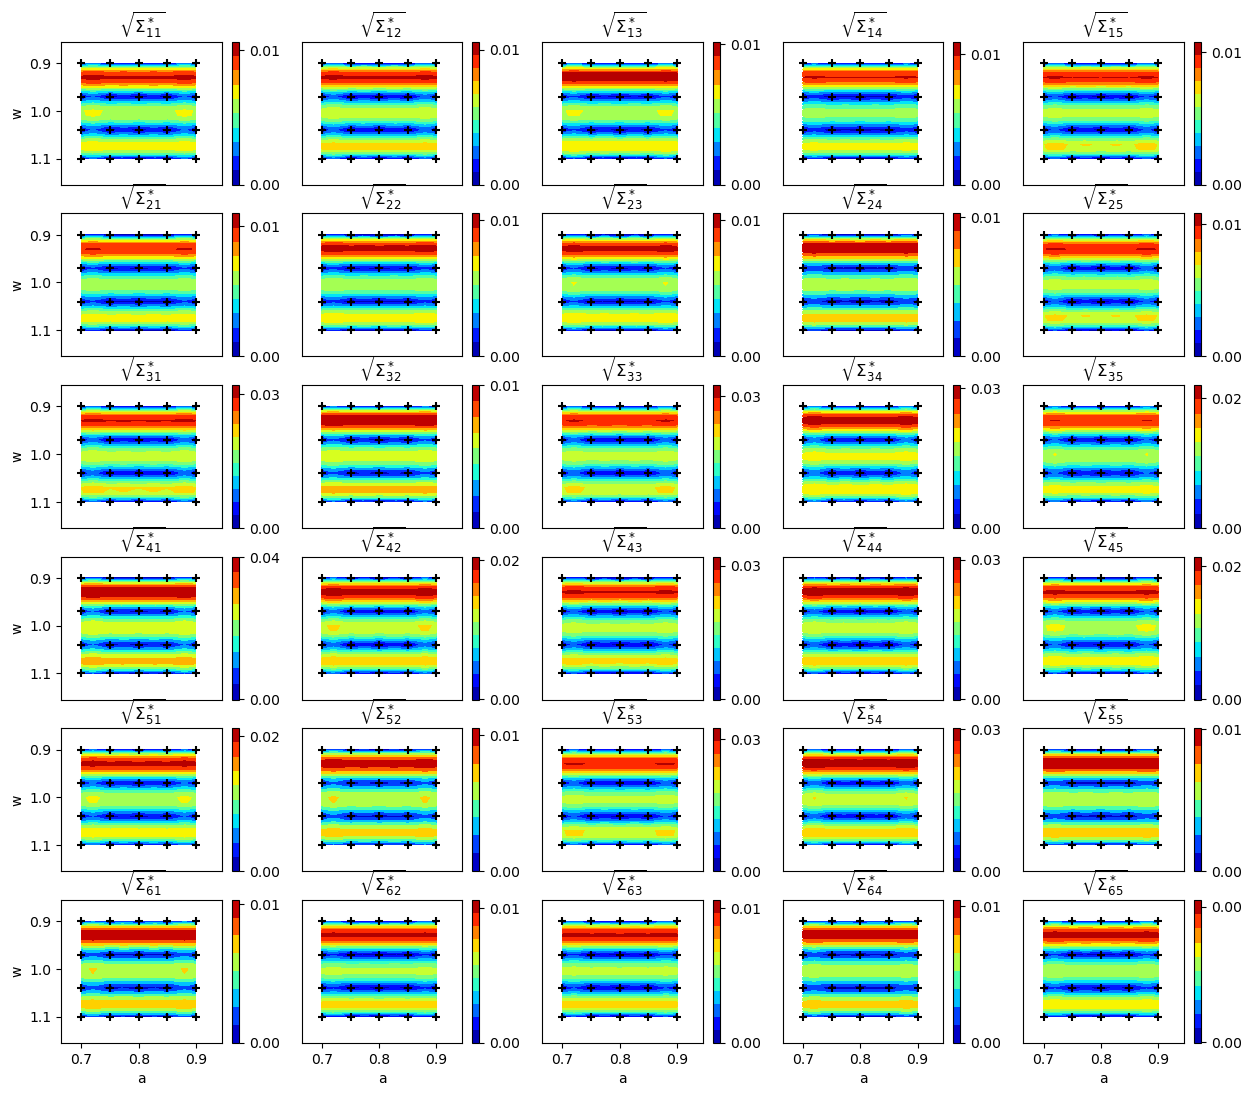

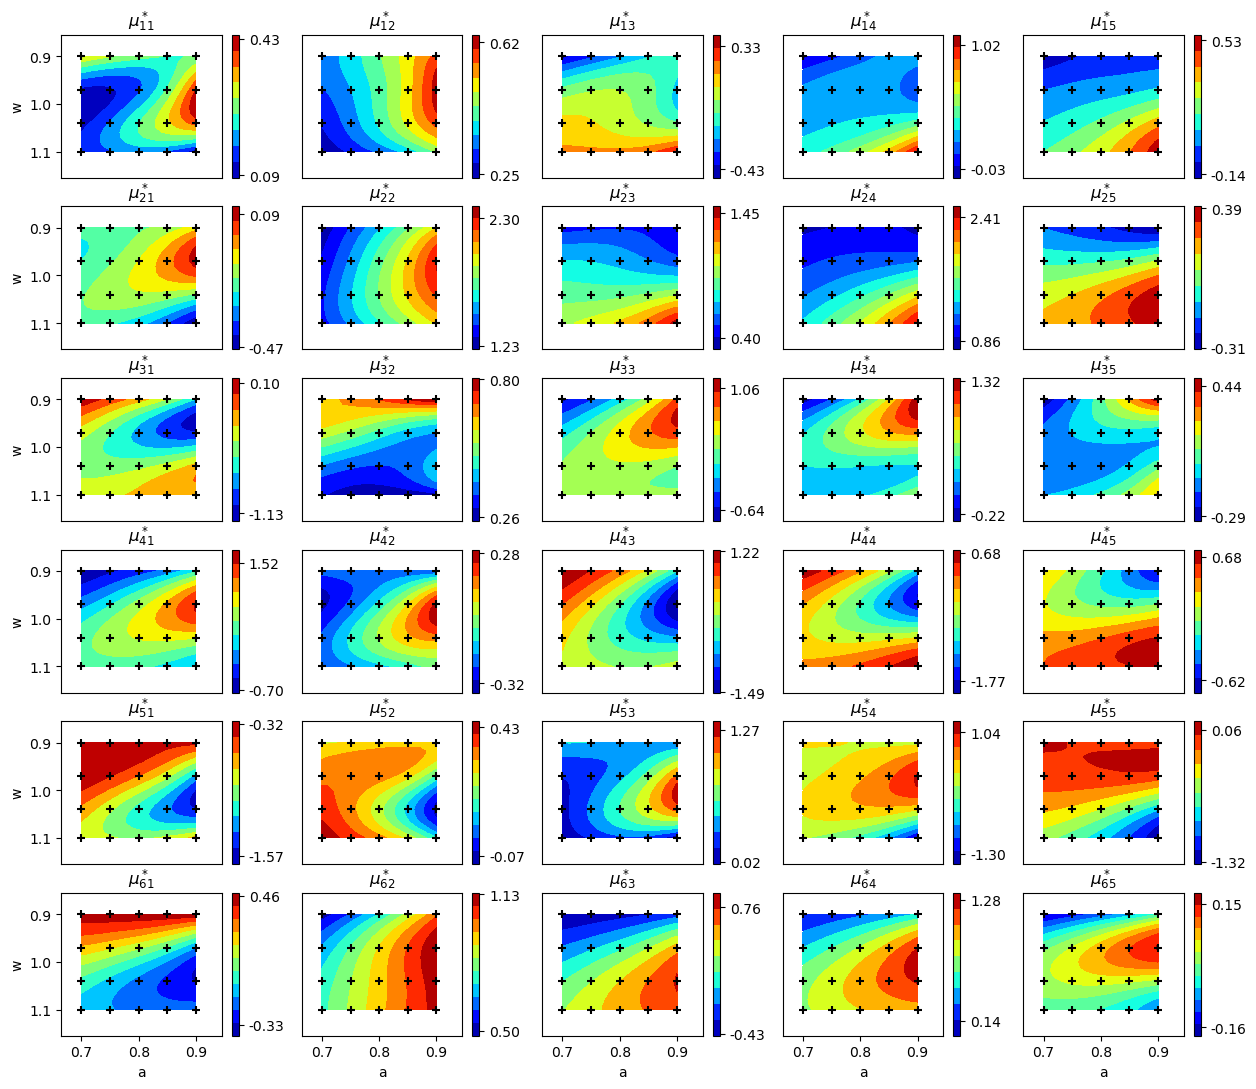

In [6]:
from lasdi.postprocess import plot_gp2d

plot_gp2d(a_grid, w_grid, gp_pred_mean.reshape([n_a_grid, n_w_grid, -1]), gp_pred_std.reshape([n_a_grid, n_w_grid, -1]),
          param_train, param_labels=['a', 'w'], plot_shape=[6, 5])

(21, 21)
(21, 21)
(20, 2)


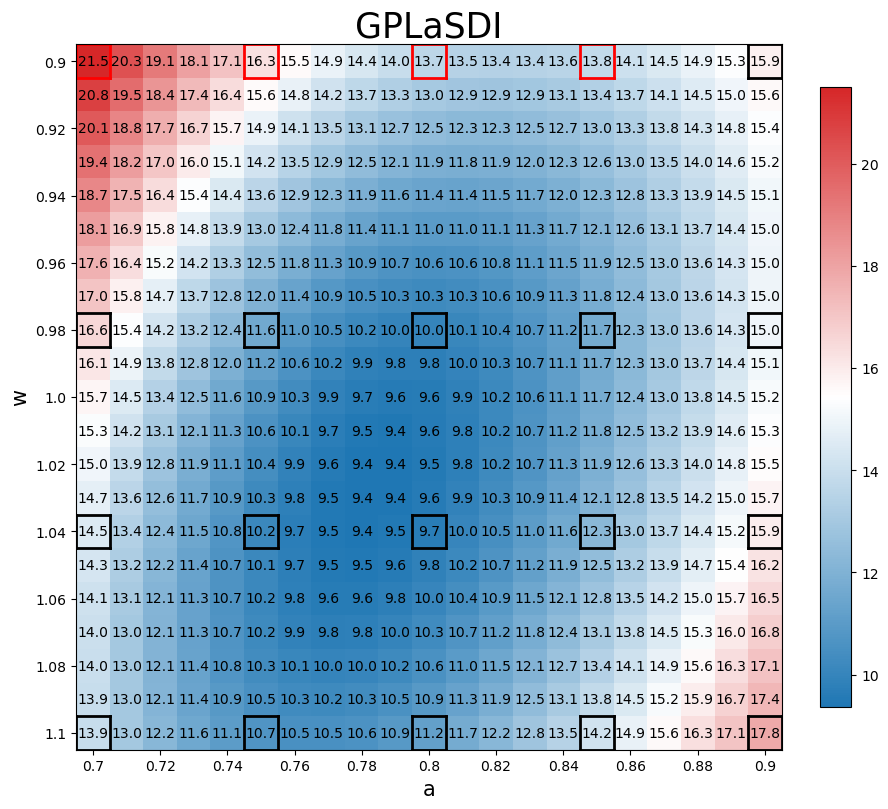

In [7]:
from lasdi.postprocess import heatmap2d
print(a_grid.shape)
print(avg_rel_error.shape)
print(param_train.shape)
heatmap2d(avg_rel_error * 100, a_grid[:, 0], w_grid[0], param_train, 4, param_labels=['a', 'w'], title='GPLaSDI')

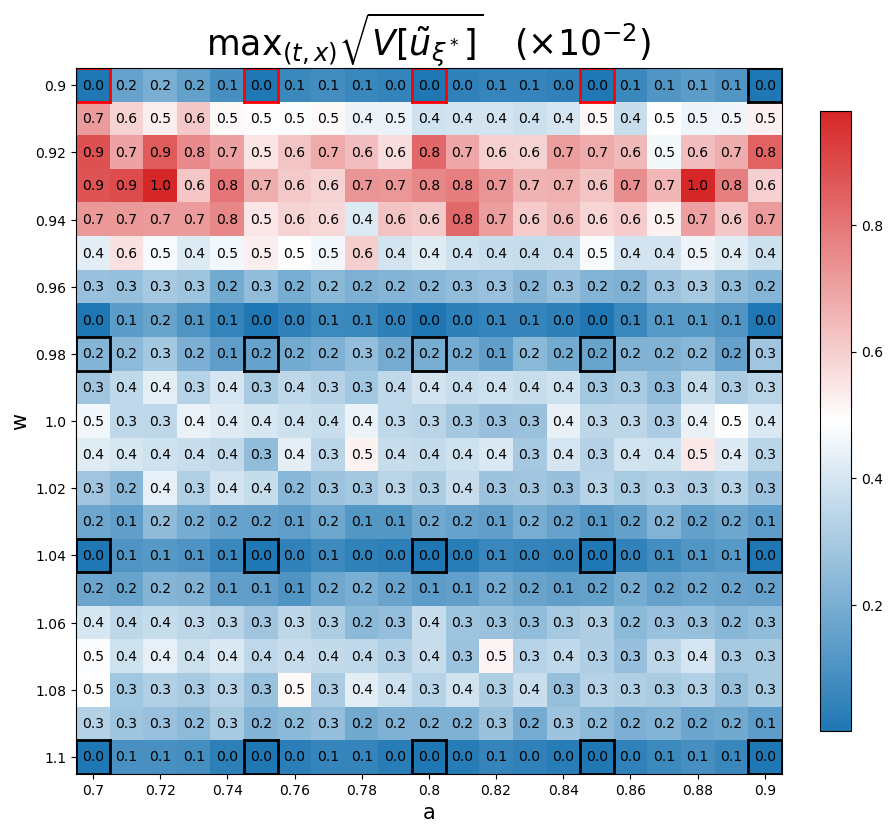

In [8]:
heatmap2d(max_std * 100, a_grid[:, 0], w_grid[0], param_train, 4, param_labels=['a', 'w'], title=r'max$_{(t,x)}\sqrt{V[\tilde{u}_{\xi^*}]}$   ($\times10^{-2}$)')

/Users/margaret/anaconda3/envs/python3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


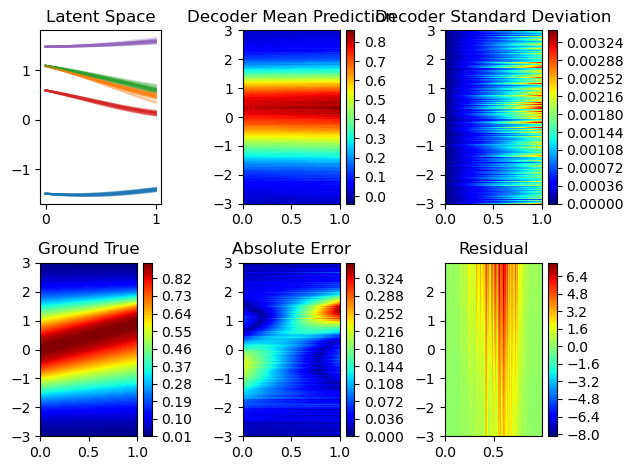

In [9]:
from lasdi.postprocess import plot_prediction

a, w = 0.9, 1.07
param = np.array([[a, w]])
true = physics.solve(param[0])
true = true.detach().numpy().reshape([physics.grid_size[0], physics.nt]).T
scale = 1

Z = sample_roms(autoencoder, physics, sindy, gp_dictionnary, param, n_samples)

Z_mean = Z[0].mean(0)
Z_std = Z[0].std(0)

pred = autoencoder.decoder(torch.Tensor(Z)).detach().numpy()
pred_std = pred[0].std(0)

plot_prediction(param, autoencoder, physics, sindy, gp_dictionnary, n_samples, true, scale)